## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## MOVIE COMPONY PROJECT 

Microsoft want to create a movie company. We want the componies first movie to perform well in the current movie industry. Their first movie should be based on the following: 
 1. Most trending genre
 2. Most popular genre combination
 3. Average RunTime

With the above objectives we can start by getting the required data for analysis 

#### IMPORTING NECESSARY LIBRARIES

In [366]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns


### Importing Data from local movie sources like IMDB_Studios

In [367]:
title_basics = pd.read_csv("data/title.basics.csv")
title_ratings = pd.read_csv("data/title.ratings.csv")

In [368]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [369]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Filtering the dataset so that we remain with  relevant data

In [370]:
title_basics = title_basics[["tconst","original_title","start_year","runtime_minutes","genres"]]
title_ratings = title_ratings[["tconst","averagerating","numvotes"]]

Checking the shape of the data to see if they allign

In [371]:
print(f"Title_basics shape{title_basics.shape}")
print(f"Title_ratings shape{title_ratings.shape}")

Title_basics shape(146144, 5)
Title_ratings shape(73856, 3)


Merging the two datasets on a common column which is the ' tconst ' column so that the  data is accurate

In [372]:
imdb_movies = pd.merge(title_basics, title_ratings, on='tconst', how='inner')
imdb_movies.head(10)

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


### Data Cleaning

Cleaning the dataset by removing any Null value to prevent inaccurate plots due to outliars

In [373]:
imdb_movies.isna().sum()

tconst                0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [374]:
imdb_movies.dropna(subset=["genres"], inplace=True)

In [375]:
imdb_movies.isna().sum()

tconst                0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

In [376]:
imdb_movies.shape

(73052, 7)

In [377]:
imdb_movies.dropna(subset=["runtime_minutes"],inplace=True)

In [378]:
imdb_movies.isna().sum()

tconst             0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [379]:
imdb_movies.shape

(65720, 7)

### Data Understanding

This is the final clean dataset ready for analysis. I am going through the dataset and obtaining basic information about the dataset such as the column names, number of columns, the general shape of the dataset and type of the data 

In [380]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   original_title   65720 non-null  object 
 2   start_year       65720 non-null  int64  
 3   runtime_minutes  65720 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    65720 non-null  float64
 6   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


Here im checking on basic mathematical attributes of the numerical columns

In [381]:
imdb_movies.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [400]:
highest_rating = imdb_movies.loc[imdb_movies['averagerating'].idxmax()]
print(highest_rating)

tconst                                                 tt10176328
original_title     Exteriores: Mulheres Brasileiras na Diplomacia
start_year                                                   2018
runtime_minutes                                              52.0
genres                                                Documentary
averagerating                                                10.0
numvotes                                                        5
Name: 702, dtype: object


Checking the year with the highest movie count 

In [ ]:
most_movie_year = imdb_movies['start_year'].value_counts().idxmax()
print(most_movie_year)

2016


In [ ]:
best_genre_2016 = imdb_movies
print(best_genre_2016['start_year'].dtype)

    

int64


In [ ]:
best_genre_2016 = best_genre_2016[best_genre_2016['start_year']==2016]

In [ ]:
best_genre_2016 = best_genre_2016['genres'].explode().value_counts().idxmax()
best_genre_2016 

'Documentary'

In [ ]:
best_movie_genre = imdb_movies['genres'].explode().value_counts().idxmax()
best_movie_genre

'Drama'

Obtaining the most common genre for every start year

In [ ]:
years_genre = imdb_movies
years_genre['genres'] = years_genre['genres'].astype(str)
years_genre['genres'] = years_genre['genres'].str.split(',')
years_genre = years_genre.explode('genres')
years_genre_count = years_genre.groupby(['start_year','genres']).size().reset_index(name='count')
common_genres = years_genre_count.sort_values(['start_year','count'], ascending=[True,False])
common_genres = common_genres.drop_duplicates('start_year')



In [ ]:
common_genres.head(20)

,start_year,genres,count
7,2010,Drama,2643
30,2011,Drama,2851
53,2012,Drama,2927
76,2013,Drama,3291
100,2014,Drama,3319
124,2015,Drama,3383
147,2016,Drama,3285
170,2017,Drama,3184
194,2018,Drama,2757
218,2019,Drama,754


# VISUALISATIONS

#### A histogram of the average rating of the movies

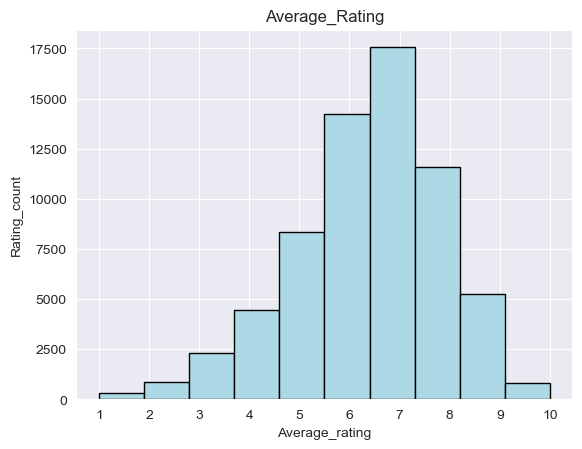

In [ ]:
x = imdb_movies["averagerating"]
plt.hist(x, bins=10, color="lightblue", edgecolor="black")
plt.title("Average_Rating")
plt.xlabel('Average_rating')
plt.xticks(range(1,11))
plt.ylabel("Rating_count")
plt.show()

#### A box plot of the average rating

##### 1. With Outliars

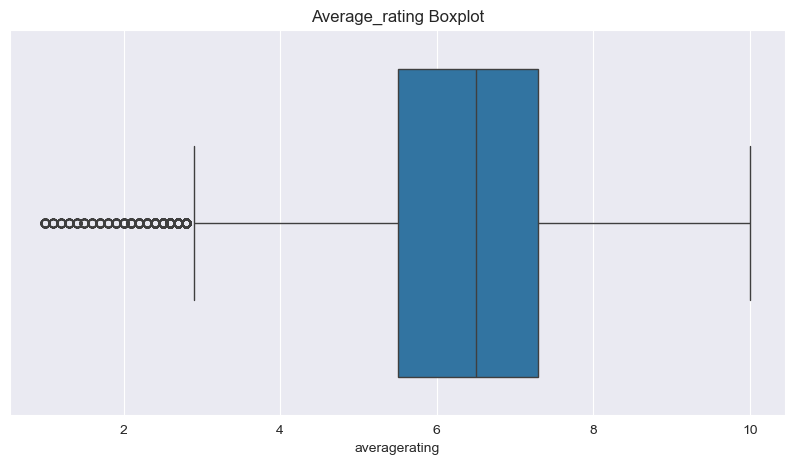

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="averagerating",data=imdb_movies, showfliers=True)
plt.title("Average_rating Boxplot")
sns.set_style('darkgrid')
plt.show()


##### 2. Without Outliars

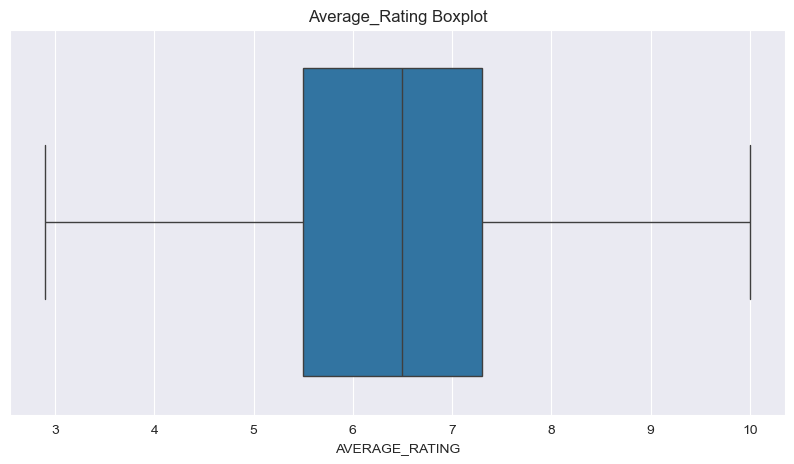

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="averagerating", data=imdb_movies, showfliers=False)
plt.xlabel('AVERAGE_RATING')
plt.title("Average_Rating Boxplot")
sns.set_style('darkgrid')
plt.show()


#### Reducing extreme outliars by filtering using the quartile ranges

In [ ]:
q1 = imdb_movies["runtime_minutes"].quantile(0.25)
q3 = imdb_movies["runtime_minutes"].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
imdb_clean = imdb_movies[(imdb_movies['runtime_minutes'] >= lower_bound) & (imdb_movies['runtime_minutes'] <= upper_bound )]

## A boxplot of the runtime in minutes

#### 1. Withouliars

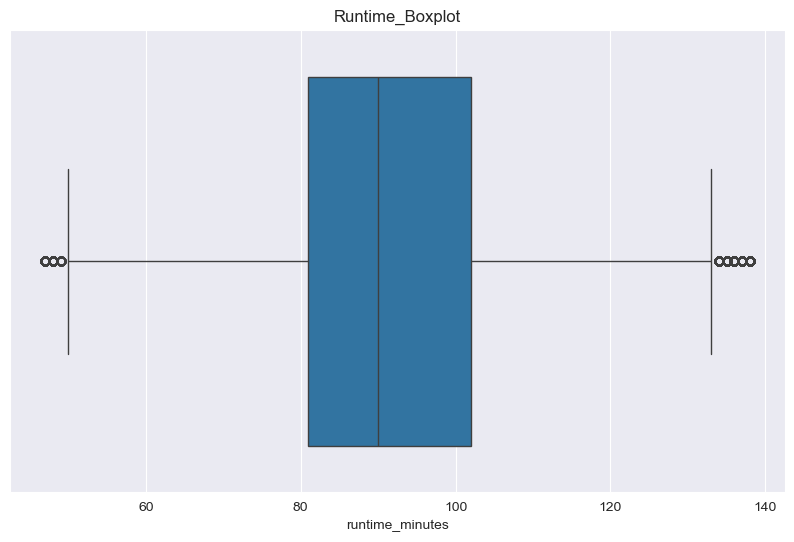

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="runtime_minutes", data=imdb_clean, showfliers=True)
plt.title("Runtime_Boxplot")
sns.set_style('darkgrid')
plt.show()

#### 2. Without Outliars

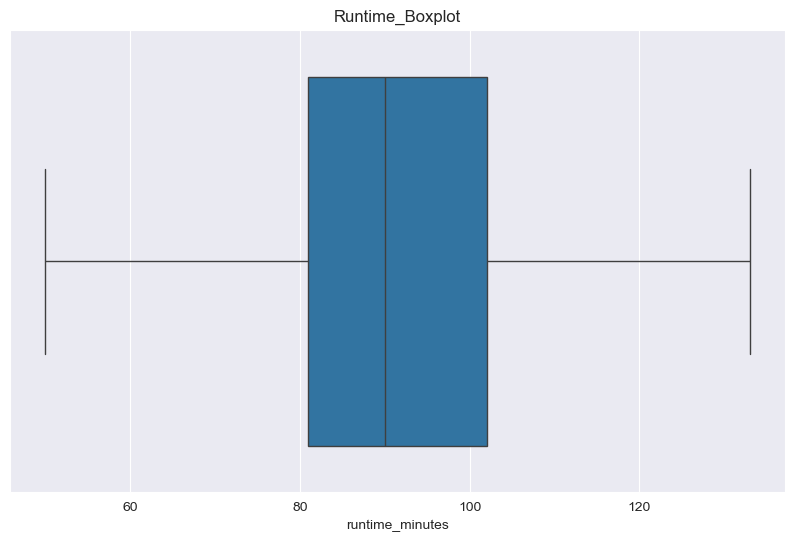

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="runtime_minutes", data=imdb_clean, showfliers=False)
plt.title("Runtime_Boxplot")
sns.set_style('darkgrid')
plt.show()

#### Histogram of the runtime in minutes

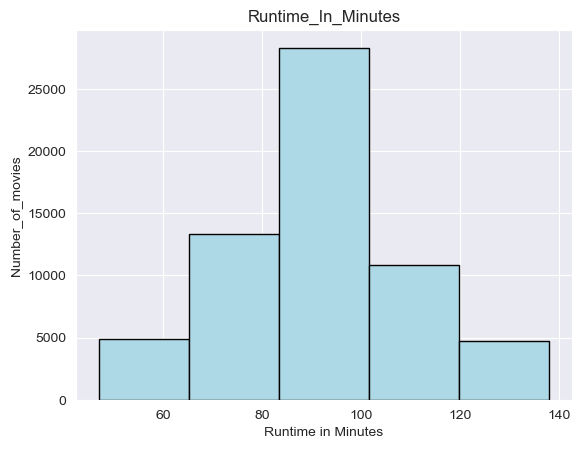

In [ ]:
x = imdb_clean["runtime_minutes"]
plt.hist(x, bins=5, color="lightblue", edgecolor="black")
plt.title("Runtime_In_Minutes")
plt.xlabel('Runtime in Minutes')
plt.ylabel("Number_of_movies")
plt.show()

#### Top 20 most common genres

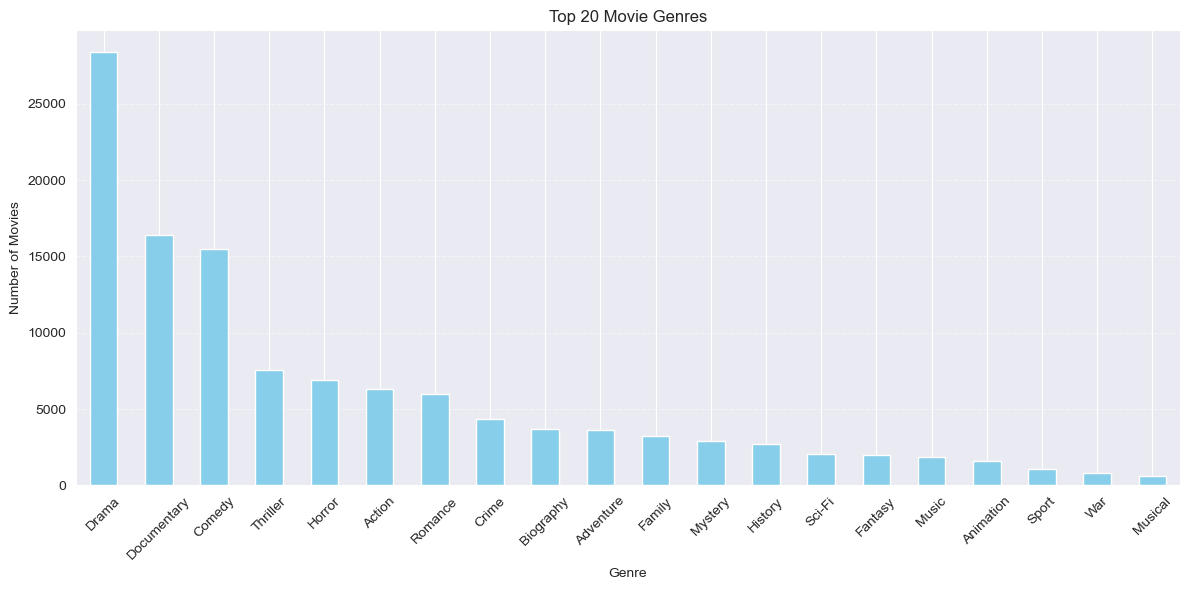

In [ ]:
df = imdb_movies.explode('genres')
genre_count = df['genres'].value_counts()
top_n = 20
plt.figure(figsize=(12, 6))
genre_count.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f"Top {top_n} Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Top 20 individual genres by average rating

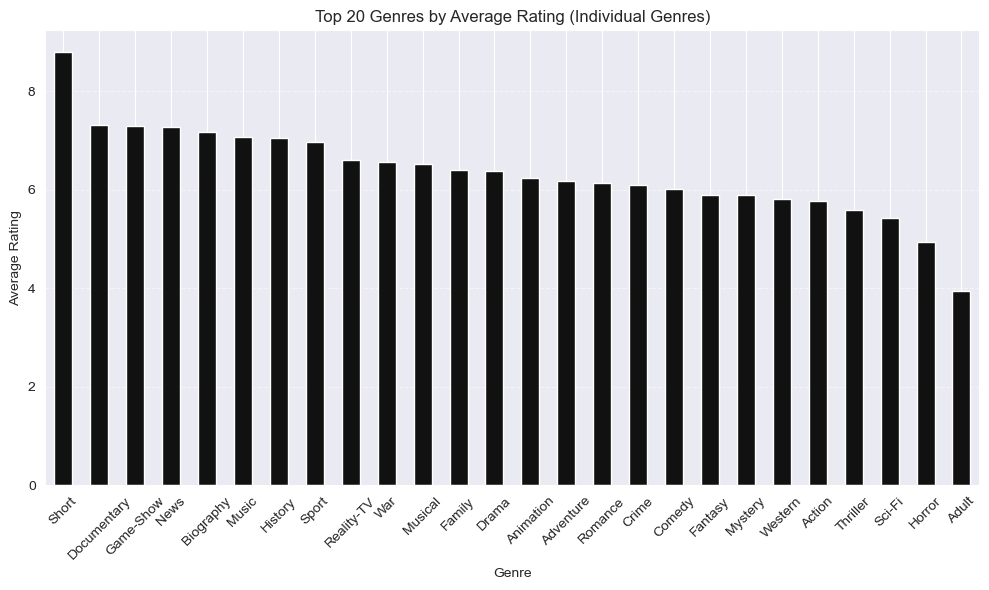

In [ ]:
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')
df["genres"]
df['averagerating'] = pd.to_numeric(df['averagerating'], errors='coerce')
genre_rating = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_rating.head(50).plot(kind='bar', color="#111111")
plt.title("Top 20 Genres by Average Rating (Individual Genres)")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Checking for correlation

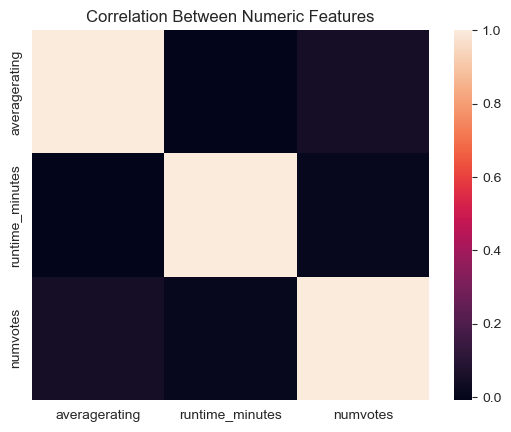

In [ ]:
sns.heatmap(imdb_movies[['averagerating','runtime_minutes','numvotes']].corr())
plt.title("Correlation Between Numeric Features")
plt.show()

In [ ]:
imdb_exploded = imdb_movies.explode('genres')
genre_stats = imdb_exploded.groupby('genres')[['averagerating', 'runtime_minutes', 'numvotes']].mean().sort_values('averagerating', ascending=False)
print(genre_stats)

             averagerating  runtime_minutes      numvotes
genres                                                   
Short             8.800000        18.000000      8.000000
Documentary       7.316787        85.766303    286.786945
Game-Show         7.300000       117.000000   1734.500000
News              7.278783        78.271304    214.406957
Biography         7.169185        90.832927   5849.763878
Music             7.070662        93.228308   2955.349241
History           7.048928        92.605030   2898.483358
Sport             6.964604        92.182894   3412.451319
Reality-TV        6.600000        76.000000     30.307692
War               6.573962        97.011321   3374.472956
Musical           6.524451       104.369906   2171.189655
Family            6.401362        92.311359   2670.517487
Drama             6.391692        98.434247   4206.977143
Animation         6.250836        85.456347   9503.384520
Adventure         6.178873        93.771334  23259.583817
Romance       

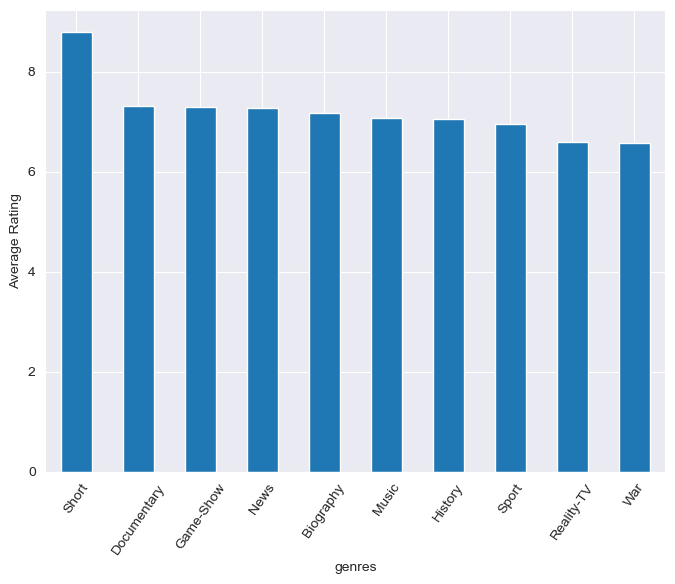

In [ ]:
genre_stats['averagerating'].head(10).plot(kind='bar', figsize=(8, 6))
plt.xticks(rotation=55)
plt.ylabel('Average Rating')
plt.show()

#### Checking genres with highest viewer count based on num of votes

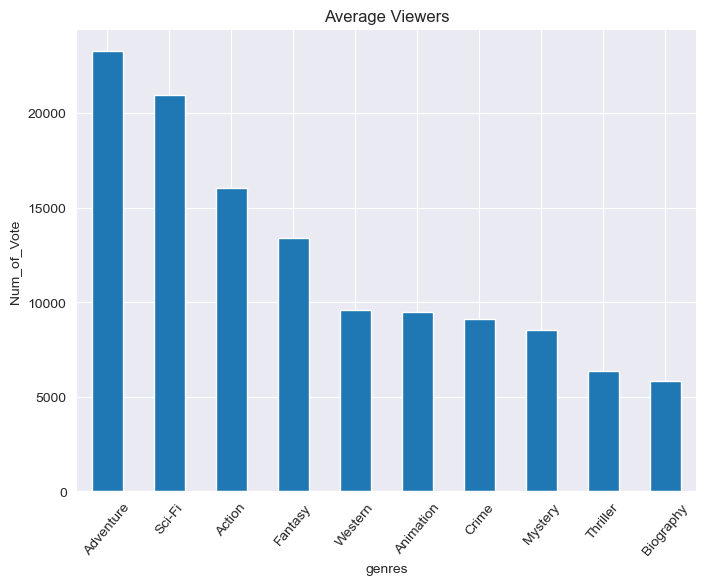

In [ ]:
votes = imdb_exploded.groupby('genres')[['averagerating', 'runtime_minutes', 'numvotes']].mean().sort_values('numvotes', ascending=False)
votes['numvotes'].head(10).plot(kind='bar', figsize=(8, 6))
plt.xticks(rotation = 50)
plt.ylabel("Num_of_Vote")
plt.title("Average Viewers")
plt.show()

#### Based on the analysis and visualisation I can conclude the following:
 1. The most common genre is drama
 2. The genre with the highest average rating is shorts
 3. The genre with the highest voters_count(audience) is Adventure
 4. The highest rated genre is a documentary

### Recomendations

### Based on the conclusions and findings, I would recomend the following :
1. Genres
- Adventure if they want high view count
- Documentary if they are about a high_average rating
- Drama if the want something relatively common in the current movie industry

2. Runtime
- Eighty to a hundred minutes
- Since its the most common runtime and it is not too long that the audiences gets bored
